In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Inizializzazione di K centroidi casuali d'esempio dalla matrice X
def init_rand_centroids(K,X):
    
    m,n = np.shape(X)
    centroids = np.empty((K,n))

    for i in range(K):
        centroids[i] =  X[np.random.choice(range(m))]

    return centroids

In [3]:
# Calcolo della distanza euclidea
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

In [4]:
# Trova e restituisce l'indice del centroide più vicino di un vettore di X
def closest_centroid(x, centroids, K):
    
    distances = np.empty(K)

    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)

    return np.argmin(distances)

In [5]:
# Restituisce una matrice di indici di cluster per tutti i campioni di dati
def create_clusters(centroids, K, X):
    
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
        
    return cluster_idx

In [6]:
# Calcolo della media dei nuovi centroidi dei cluster
def means(cluster_idx, K, X):
   
    _, n = np.shape(X)
    centroids = np.empty((K, n))

    for i in range(K):
        cluster_i_points = X[cluster_idx == i]              # Raggruppa i punti per il cluster 'i'  
        centroids[i] = np.mean(cluster_i_points, axis=0)    # Calcolo media dei punti

    return centroids                         

In [7]:
# Calcolo del K-means e dei cluster finali
def K_means(K, X, max_iterations = 500):
    
    centroids = init_rand_centroids(K, X)
    # print(f"initial centroids: {centroids}")

    # Loop fino a max_iterations o convergenza
    for _ in range(max_iterations):
        
        clusters = create_clusters(centroids, K, X)
        prev_centroids = centroids                          
        
        centroids = means(clusters, K, X)
        
        diff = prev_centroids - centroids

        if not diff.any():
            return clusters, centroids

    return clusters, centroids

# "clusters" conserva l'indice del cluster in cui va il punto
# "centroids" conserva le coordinate dei K centroidi

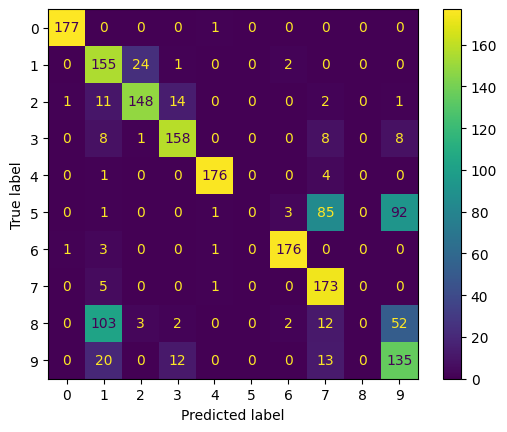

In [8]:
########################
###       MAIN       ###
########################

# loading files & settings
digits = load_digits()
X, Y = digits.data, digits.target

X = X/1000

K = 10

# K-Means & Cluster applying
clusters, centroids = K_means(K, X, 500)

labels = np.zeros_like(clusters)
for i in range(K):
    mask = (clusters == i)
    labels[mask] = mode(Y[mask])[0]

# Confusion-Matrix
ConfusionMatrixDisplay(confusion_matrix(Y, labels)).plot()

plt.scatter(X[:,0], X[:,1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.colormaps["nipy_spectral"])

plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_20324\1529461370.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


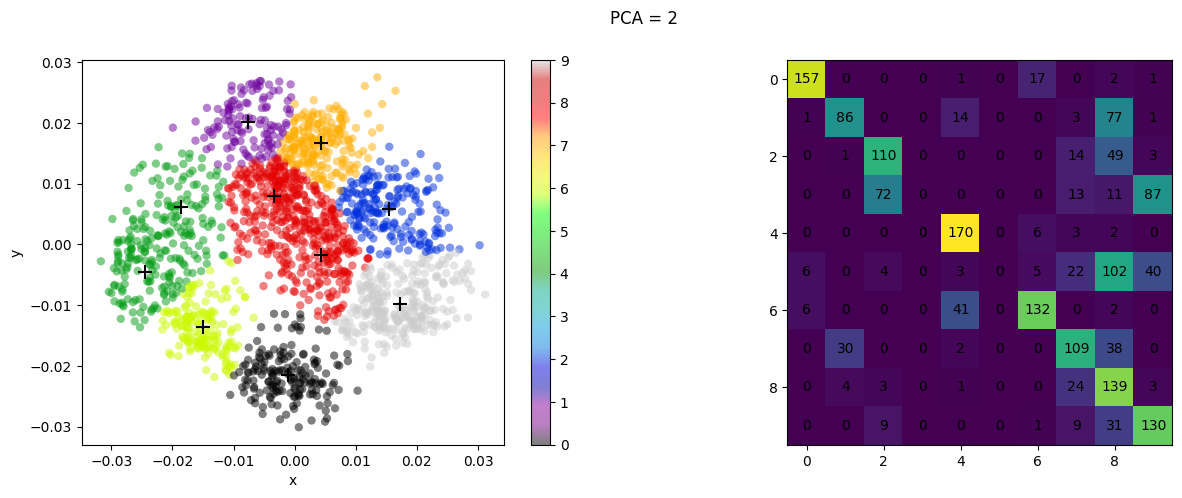

C:\Users\andre\AppData\Local\Temp\ipykernel_20324\1529461370.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


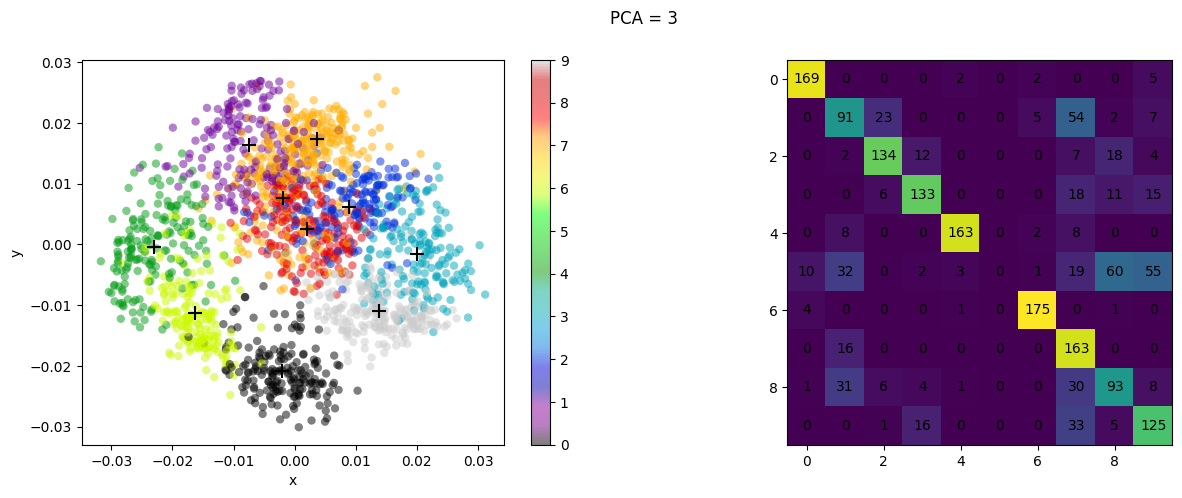

C:\Users\andre\AppData\Local\Temp\ipykernel_20324\1529461370.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


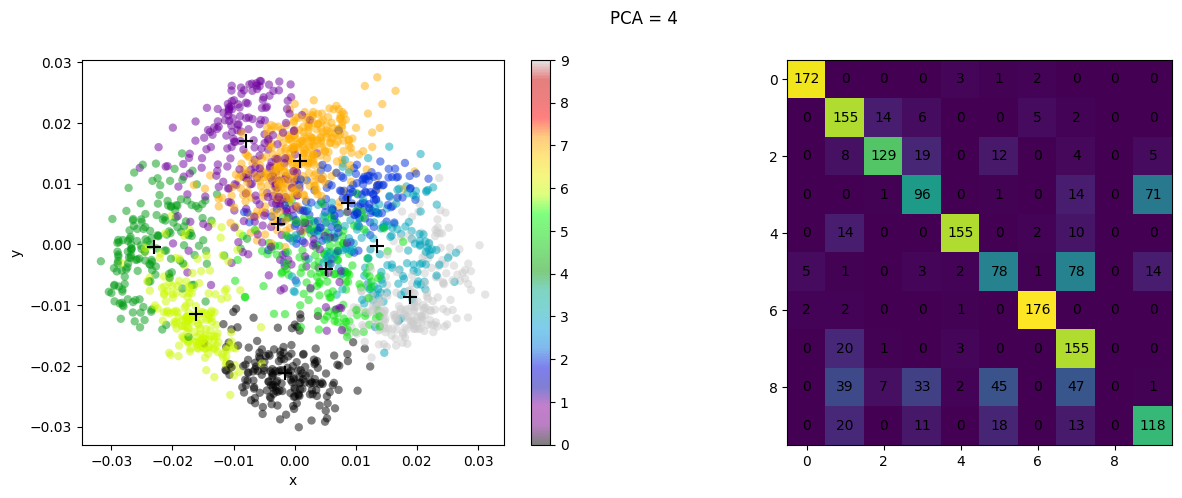

C:\Users\andre\AppData\Local\Temp\ipykernel_20324\1529461370.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


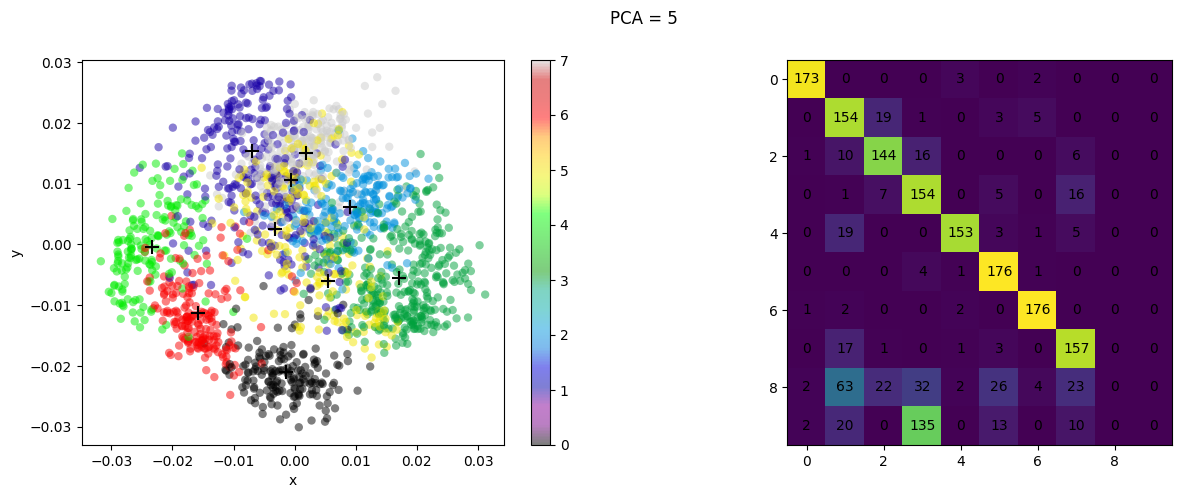

C:\Users\andre\AppData\Local\Temp\ipykernel_20324\1529461370.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


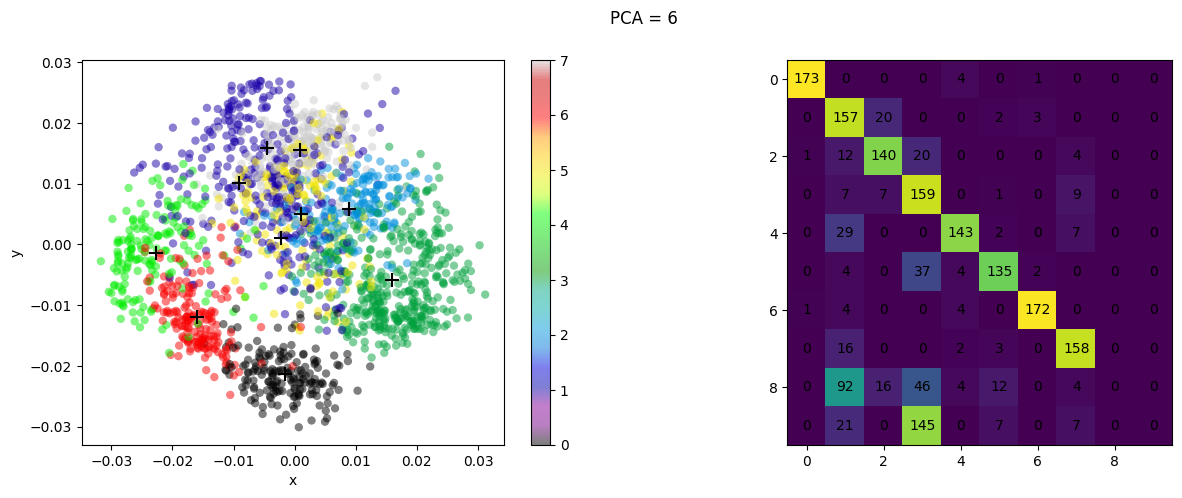

In [9]:
########################
###       MAIN       ###
########################

# loading files & settings
digits = load_digits()

K = 10

for j in range (2,7):

    X, Y = digits.data, digits.target

    X = X/1000

    # PCA applying
    X = - PCA(j).fit_transform(X)
    

    plt.subplots(figsize=(15, 5))
    plt.suptitle("PCA = "+str(j))
    plt.subplot(1, 2, 1)

    # K-Means & Cluster applying
    clusters, centroids = K_means(K, X, 500)

    labels = np.zeros_like(clusters)
    for i in range(K):
        mask = (clusters == i)
        labels[mask] = mode(Y[mask])[0]

    # K-Means & Cluster plotting
    plt.scatter(X[:,0], X[:,1], 
                c=labels.astype(int), edgecolor='none', alpha=0.5,
                cmap=plt.colormaps["nipy_spectral"])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')

    plt.scatter(centroids[:,0], centroids[:,1], marker="+", s=100, color="black")


    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)

    # Confusion-Matrix
    #ConfusionMatrixDisplay(confusion_matrix(Y, labels))
    test = confusion_matrix(Y, labels)
    plt.imshow(test)

    for i in range(K):
        for j in range(K):
            c = test[j,i]
            plt.text(i, j, str(c), va='center', ha='center')

    plt.show()



